<a href="https://colab.research.google.com/github/Akshykumar007/HospitalManagementSystem/blob/main/CNN_Alzheimer_disease_two_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alzheimer Disease Classification Using ***CNN***






In [ ]:
import numpy as np 
import tensorflow as tf 
import keras 
import os 
from google.colab.patches import cv2_imshow 
import cv2 
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
from tensorflow.keras.models import load_model


In [ ]:
# mounting files from Drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
#unzippping images dataset 
!unzip gdrive/MyDrive/Dataset/classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: classification/Demented/Dem2200.jpg  
  inflating: classification/Demented/Dem2201.jpg  
  inflating: classification/Demented/Dem2202.jpg  
  inflating: classification/Demented/Dem2203.jpg  
  inflating: classification/Demented/Dem2204.jpg  
  inflating: classification/Demented/Dem2205.jpg  
  inflating: classification/Demented/Dem2206.jpg  
  inflating: classification/Demented/Dem2207.jpg  
  inflating: classification/Demented/Dem2208.jpg  
  inflating: classification/Demented/Dem2209.jpg  
  inflating: classification/Demented/Dem221.jpg  
  inflating: classification/Demented/Dem2210.jpg  
  inflating: classification/Demented/Dem2211.jpg  
  inflating: classification/Demented/Dem2212.jpg  
  inflating: classification/Demented/Dem2213.jpg  
  inflating: classification/Demented/Dem2214.jpg  
  inflating: classification/Demented/Dem2215.jpg  
  inflating: classification/Demented/Dem2216.jpg  
  inflating: classification/Deme

Collecting scan Image dataset


In [ ]:
base_dir = '/content/classification' 

In [ ]:
#Printing the dataset classes seperated as folders
all_tags = os.listdir(base_dir)
print(all_tags)

['Demented', 'NonDemented']


In [ ]:

types = list(set(all_tags))
print(len(types))
print(types)

2
['NonDemented', 'Demented']


In [ ]:
no_of_class = 2

In [ ]:
pip install Pillow

**Pre Processing**

In [ ]:
#Printing No of dataset in each classes
no_images = 0
for tag in all_tags:
  folder = os.listdir(base_dir+'/'+tag)
  print(tag,len(folder))
  no_images = len(folder)+no_images
print("Total images",no_images)


Demented 3136
NonDemented 3200
Total images 6336


In [ ]:
#creating Array to store Images and labels
channels=3
height=300
width=300
images_array=np.ndarray(shape=(no_images,height,width,channels),dtype=np.float32)
image_tag_list = [0] * no_images
print("Image Array",len(images_array))
print("Image Tag",len(image_tag_list))

Image Array 6336
Image Tag 6336


In [ ]:
# converting img to array and resizing and add to image array
k = 0
for i in all_tags:
  print(i)
  for j in os.listdir(base_dir + '/' + i):
    #print(j,i)
    image = img_to_array(load_img(base_dir + '/' +i +'/'+j))
    images_array[k] = cv2.resize(image,(300,300),interpolation=cv2.INTER_LINEAR)
    image_tag_list[k] = i
    k = k+1

Demented
NonDemented


[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


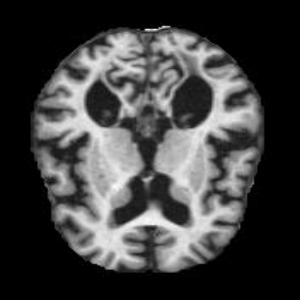

In [ ]:
#printing sample image and raw pixcel dataset
print(images_array[0])
cv2_imshow(images_array[0])

In [ ]:
image_tag_list=np.array(image_tag_list)

In [ ]:
image_tag_list

array(['Demented', 'Demented', 'Demented', ..., 'NonDemented',
       'NonDemented', 'NonDemented'], dtype='<U11')

In [ ]:
# Labelling {'Demented': 1, 'NonDemented': 0}
k=0
tag_dict={}
for i in image_tag_list:
    if i not in tag_dict.keys():
        tag_dict[i]=k
        k+=1


In [ ]:
tag_dict

{'Demented': 0, 'NonDemented': 1}

In [ ]:
#convert the text tags to numbered lables 
for i in range(len(image_tag_list)):
    image_tag_list[i]=tag_dict[image_tag_list[i]]
image_tag_list

array(['0', '0', '0', ..., '1', '1', '1'], dtype='<U11')

In [ ]:
#convert images labels array to category values
image_tag_list=tf.keras.utils.to_categorical(image_tag_list, num_classes=no_of_class)

In [ ]:
#printing Random values for analysing 
print(image_tag_list[200]) 
print(image_tag_list[3200]) 
print(image_tag_list[3600]) 
print(image_tag_list[6000]) 

[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models,activations

Separate test and train dataset

In [ ]:
#spliting tast and train dataset
X_train, X_test, y_train, Y_test = train_test_split(images_array, image_tag_list, random_state=10, test_size=0.2)

In [ ]:
#Feature Extraction by convluttional layer
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(no_of_class,activation='softmax'))

Train the model with training dataset

In [ ]:
#Declainggg an Adam optttimizerr
opt = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
)
#deffiningg the model wittth tthe opttimizerr
model.compile(optimizer=opt,
              loss=tf.keras.losses.CategoricalCrossentropy(reduction='sum'),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
history = model.fit(X_train, y_train, epochs=5,batch_size=64)

Epoch 1/5
80/80 [==============================] - 706s 9s/step - loss: 3868.9866 - accuracy: 0.4970
Epoch 2/5
80/80 [==============================] - 706s 9s/step - loss: 49.3605 - accuracy: 0.5239
Epoch 3/5
80/80 [==============================] - 704s 9s/step - loss: 48.6849 - accuracy: 0.5298
Epoch 4/5
80/80 [==============================] - 699s 9s/step - loss: 46.3977 - accuracy: 0.5596
Epoch 5/5
80/80 [==============================] - 697s 9s/step - loss: 42.4429 - accuracy: 0.6032


In [ ]:
history = model.fit(X_train, y_train, epochs=3,batch_size=64)

Epoch 1/3
80/80 [==============================] - 706s 9s/step - loss: 16.0524 - accuracy: 0.8615
Epoch 2/3
80/80 [==============================] - 704s 9s/step - loss: 15.4033 - accuracy: 0.8615
Epoch 3/3
80/80 [==============================] - 709s 9s/step - loss: 15.8806 - accuracy: 0.8577


In [ ]:
history = model.fit(X_train, y_train, epochs=1,batch_size=32)

159/159 [==============================] - 773s 5s/step - loss: 6.5360 - accuracy: 0.8781


In [ ]:
history = model.fit(X_train, y_train, epochs=1,batch_size=32)

159/159 [==============================] - 740s 5s/step - loss: 5.7583 - accuracy: 0.9053


In [ ]:
model_path = '/content/gdrive/MyDrive/Dataset/models'
if os.path.isfile(model_path+'/trained_model_without_test.h5') is False:
    model.save(model_path+'/trained_model_without_test.h5')

In [ ]:
saved_model = load_model('/content/gdrive/MyDrive/Dataset/models/trained_model_without_test.h5')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.


.

.

.

.

.

.

.

.

.

.


.

In [ ]:
saved_model.optimizer

In [ ]:
history = model.fit(X_train, y_train, epochs=3,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/3
159/159 [==============================] - 767s 5s/step - loss: 27.6012 - accuracy: 0.5249 - val_loss: 22.3340 - val_accuracy: 0.4637
Epoch 2/3
159/159 [==============================] - 769s 5s/step - loss: 24.4776 - accuracy: 0.5270 - val_loss: 22.1149 - val_accuracy: 0.5213
Epoch 3/3
159/159 [==============================] - 768s 5s/step - loss: 23.7845 - accuracy: 0.5560 - val_loss: 19.3254 - val_accuracy: 0.7066


In [ ]:
#history append
history.history

{'accuracy': [0.5248618721961975, 0.5270323753356934, 0.5560379028320312],
 'loss': [27.6011962890625, 24.477563858032227, 23.784517288208008],
 'val_accuracy': [0.4637224078178406, 0.5212934017181396, 0.7066246271133423],
 'val_loss': [22.33396339416504, 22.11488914489746, 19.32536506652832]}

In [ ]:
history = model.fit(X_train, y_train, epochs=1,batch_size=32,validation_data=(X_test,Y_test))

159/159 [==============================] - 765s 5s/step - loss: 22.8307 - accuracy: 0.5864 - val_loss: 20.7107 - val_accuracy: 0.6380


In [ ]:
history.history

{'accuracy': [0.5864246487617493],
 'loss': [22.830657958984375],
 'val_accuracy': [0.6380126476287842],
 'val_loss': [20.71071434020996]}

Test model which is sprcifiecd using validation_data params

In [ ]:
history = model.fit(X_train, y_train, epochs=1,batch_size=64,validation_data=(X_test,Y_test))
history.history 

80/80 [==============================] - 714s 9s/step - loss: 43.4832 - accuracy: 0.5975 - val_loss: 38.0360 - val_accuracy: 0.7216


{'accuracy': [0.5974743366241455],
 'loss': [43.483177185058594],
 'val_accuracy': [0.7216088175773621],
 'val_loss': [38.03596878051758]}

In [ ]:
model_path = '/content/gdrive/MyDrive/Dataset/models'
if os.path.isfile(model_path+'/trained_model_2_acc_70.h5') is False:
    model.save(model_path+'/trained_model_2_acc_70.h5')

In [ ]:
saved_model = load_model('/content/gdrive/MyDrive/Dataset/models/trained_model_1.h5')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
acc = [0.5311760306358337,0.4956590235233307,0.5382794141769409,0.5007892847061157,0.5688634514808655,0.5222967863082886, 0.6219415664672852,0.6685082912445068,0.7221783995628357,0.7912391424179077]
val_acc = [0.4826498329639435,0.5149842500686646,0.49132493138313293,0.5149842500686646,0.578864336013794,0.6293375492095947, 0.6616719365119934,0.7444794774055481,0.7839116454124451,0.7925867438316345]
loss = [7.760738372802734, 6.995761394500732,6.9111504554748535,22.14890480041504, 46.129920959472656,27.250783920288086 ,41.94158935546875,19.087663650512695,17.22216796875,13.660080909729004]
val_loss = [7.140236854553223,6.918241500854492,6.965465068817139,22.048978805541992,42.573123931884766, 20.597469329833984,38.65205383300781,16.795164108276367,14.481680870056152,12.13831901550293]
print(len(val_acc))


10


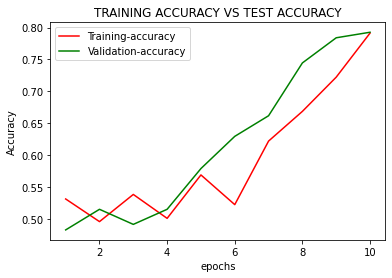

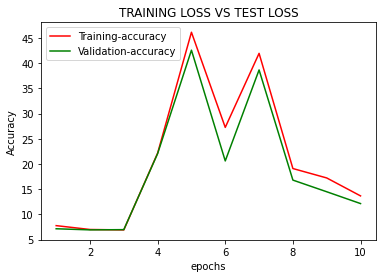

In [ ]:
plt.plot(range(1,11),acc,color='red',label='Training-accuracy')
plt.plot(range(1,11),val_acc,color='green',label='Validation-accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
leg = plt.legend();
plt.title("TRAINING ACCURACY VS TEST ACCURACY")
plt.show()
plt.plot(range(1,11),loss,color='red',label='Training-accuracy')
plt.plot(range(1,11),val_loss,color='green',label='Validation-accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
leg = plt.legend();
plt.title("TRAINING LOSS VS TEST LOSS")
plt.show()


.


























.

.


























.

.


























.

.


























.

.


























.

.


























.

In [ ]:
history = model.fit(X_train, y_train, epochs=2,batch_size=64,validation_data=(X_test,Y_test))
history.history

Epoch 1/2
80/80 [==============================] - 738s 9s/step - loss: 41.8680 - accuracy: 0.6257 - val_loss: 36.2364 - val_accuracy: 0.7137
Epoch 2/2
80/80 [==============================] - 715s 9s/step - loss: 37.9735 - accuracy: 0.6835 - val_loss: 33.1410 - val_accuracy: 0.7468


{'accuracy': [0.6256905794143677, 0.6835043430328369],
 'loss': [41.867984771728516, 37.973533630371094],
 'val_accuracy': [0.7137224078178406, 0.7468454241752625],
 'val_loss': [36.23640441894531, 33.14097595214844]}

In [ ]:
model_path = '/content/gdrive/MyDrive/Dataset/models'
if os.path.isfile(model_path+'/trained_model_3_acc_74.h5') is False:
    model.save(model_path+'/trained_model_3_acc_74.h5')

